# TUTORIAL 4 EXERCISE

## PART 1
A biomaterials engineer has proposed two different topographies for a stent. Each of these two topographies have been investigated for their angiogenesis (blood vessel formation) potential. Angiogenesis activity was measured using a fluorescence-based assays (a.u.) where higher values suggest greater amounts of blood vessel formation. 

__What is the appropriate statistical test for this data?__ 

Difference of Means Independent T-Test, Student's T-Test, Welch's T-Test

__Importing relevant libraries!__

In [11]:
import pandas as pd #library to work with data frames
import numpy as np #library to work with data frames
import matplotlib.pyplot as plt #library to plot figure
import matplotlib.dates as mdates #library for visualization
import seaborn as sns #library to plot figures
import scipy
from scipy import stats
from scipy.stats import t
import statsmodels.api as sm


__Reading the data and generating descriptive statistics.__

In [60]:
#Creating dataset
topographyA = np.array([15.8,17.3,15.7,16.9,18.5,17.3,16.5,18.1])
topographyA_df = pd.DataFrame(topographyA)
topographyB = np.array([18.5,19.4,19.3,20.1,19.6,19,18.5,18])
topographyB_df = pd.DataFrame(topographyB)
df=pd.concat([topographyA_df,topographyB_df],axis="columns")
df.columns=["topographyA","topographyB"]

In [62]:
#Generating Descriptive Statistics for both Datasets

df.describe()

,topographyA,topographyB
count,8.000000,8.000000
mean,17.012500,19.050000
std,1.002051,0.686607
min,15.700000,18.000000
25%,16.325000,18.500000
50%,17.100000,19.150000
75%,17.500000,19.450000
max,18.500000,20.100000


<Axes: >

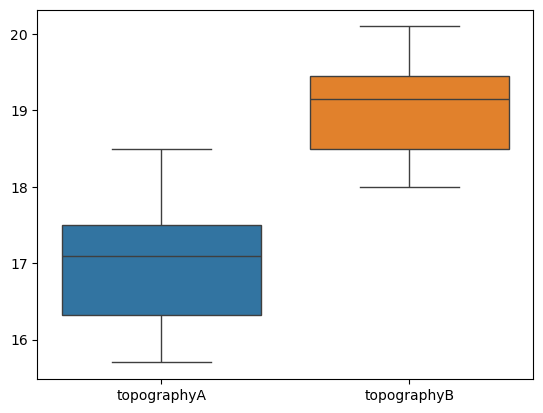

In [64]:
sns.boxplot(df)

## PART 2
__What assumptions are you making by choosing this test? Justify why they are acceptable.__  

Shapiro-wilk tests indicate that the data is normally distributed. (2 points)
Independent datasets (1 point)
Equal variances, levene’s test (2 points)

In [20]:
print("topographyA Shapiro-Wilk results:", stats.shapiro(topographyA))
print("topographyB Shapiro-Wilk results:", stats.shapiro(topographyB))

topographyA Shapiro-Wilk results: ShapiroResult(statistic=0.9502196816328298, pvalue=0.7134474607946177)
topographyB Shapiro-Wilk results: ShapiroResult(statistic=0.9743107036771741, pvalue=0.9295205456536803)


In [22]:
#Levene's Test
print(stats.levene(topographyA, topographyB, center='median'))

LeveneResult(statistic=1.0226628895184167, pvalue=0.3290476256038563)


Figure(640x480)


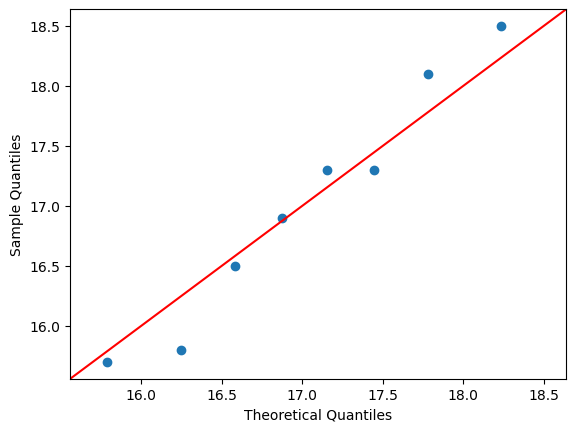

In [69]:
print(sm.qqplot(topographyA,line='45',loc=np.mean(topographyA),scale=np.std(topographyA,ddof=1)))

Figure(640x480)


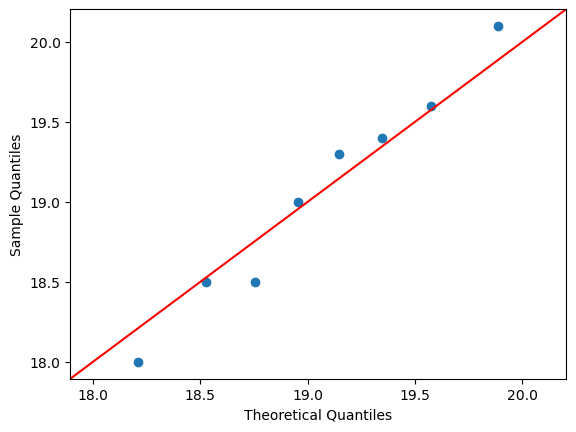

In [71]:
print(sm.qqplot(topographyB,line='45',loc=np.mean(topographyB),scale=np.std(topographyB,ddof=1)))

## PART 3: Provide the 7 steps of the Procedures for Hypothesis Tests
__1. Paramater of Interest__

__2. State the null hypothesis__

__3. State the null hypothesis__

__4. Determine appropriate test statistic__

__5. State the rejection criteria for null hypothesis__

__6. Computations__

__7. Draw Conclusions__

In [121]:
# mean of topographyA
np.mean(topographyA)

17.0125

In [125]:
# Step 1: parameter of interest is difference in means
np.mean(topographyB)-np.mean(topographyA)

2.0375000000000014

Step 2:  state the null hypothesis

Is it a one-sided test or a two-sided test?

two sided

Null hypthesis= H0= $\mu1$=$\mu2$ 

Step 3: state the alternative hypothesis

Alternative hypothesis - HA = $\mu1$ $\neq$ $\mu2$

Step 4:  test statistic is:  


The t statistic to test whether the means are different can be calculated as follows: \
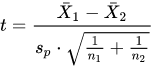

Step 5:  Reject Ho if p-value less than 0.05.  The critical values at this alhpa value are t=

n − 1 is the number of degrees of freedom for each group, and the total sample size minus two (that is, n1 + n2 − 2) is the total number of degrees of freedom, which is used in significance testing.

14 dof, n1+n2-2 = 8+8-2=14

In [209]:
# critical value of t at dof=14 and at alpha/2 = 0.025
stats.t.ppf(0.025,14)

-2.1447866879169277

In [211]:
# critical value of t at dof=14 and at alpha/2 = 0.975
stats.t.ppf(0.975,14)

2.1447866879169273

Step 6 Computations

We will calculate a pooled estimate of the combined standard deviations, which is a weighted average of the two standard deviations, used when the variances are equivalent to each other

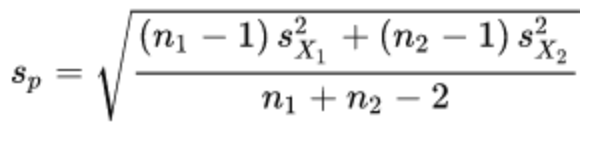

In [193]:
s_pooled=np.sqrt((((8-1)*np.std(topographyA,ddof=1)**2)+((8-1)*np.std(topographyB,ddof=1)**2))/(8+8-2))
print("The pooled standard deviation is:  "+str(s_pooled))

The pooled standard deviation is:  0.8589341401660884


In [195]:
StandErrorDiff=s_pooled*(np.sqrt(1/8+1/8))
print("The standard error of the difference is: "+str(StandErrorDiff))

The standard error of the difference is: 0.4294670700830442


In [197]:
t= (np.mean(topographyA)-np.mean(topographyB)) / StandErrorDiff
t

-4.744251985620268

Step 7:  Conclusions

In [223]:
stats.t.cdf(-4.7443,14)

0.00015690266414523286

In [225]:
# multiply by 2 for 2-sided test
2* (stats.t.cdf(-4.7443,14))

0.00031380532829046573

## PART 4
__Use python to validate the hyptheisis test__

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

stats.ttest_ind(topographyA, topographyB, equal_var=True))

In [229]:
print(stats.ttest_ind(topographyA, topographyB, equal_var=True))

TtestResult(statistic=-4.744251985620268, pvalue=0.00031383374663875653, df=14.0)


## PART 5
__Compute the corresponding confidence interval for the difference of means.__

In [233]:
cm = sm.stats.CompareMeans(sm.stats.DescrStatsW(topographyA), sm.stats.DescrStatsW(topographyB))
print("The 95% difference in mean CI is:", cm.tconfint_diff(usevar='pooled'))

The 95% difference in mean CI is: (-2.9586152548128006, -1.1163847451872022)
